1.   Sunny - 0
2.   Overcast - 1
3.   rainy - 2
**
1.   Hot - 0
2.   Mild - 1
3.   Cool - 2
**
1.   High - 0
2.   Nomal - 1
**
1.   Strong - 0
2.   Weak - 1
**
1.   No - 0
2.   Yes - 1



In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dataset = pd.read_csv('/content/playtennis.csv')
dataset

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


In [ ]:
dataset = pd.read_csv('/content/playtennis.csv')


In [ ]:
dataset['Outlook'].describe()

count        14
unique        3
top       Rainy
freq          5
Name: Outlook, dtype: object

In [ ]:
dataset.shape

(14, 5)

In [ ]:
dataset.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Wind           0
Play           0
dtype: int64

In [ ]:
dataset.describe()

,Outlook,Temperature,Humidity,Wind,Play
count,14,14,14,14,14
unique,3,3,2,2,2
top,Rainy,Mild,High,Weak,Yes
freq,5,6,7,8,9


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play         14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [ ]:
X = dataset.drop(['Play'], axis=1)
Y = dataset['Play']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [ ]:
dt = DecisionTreeClassifier(max_depth=2, random_state=0)
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)
print(Y_pred[0:5])

[1 0]


In [ ]:
dt_entropy = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=0)
dt_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

[Text(279.0, 237.82500000000002, 'X[0] <= 0.5\nentropy = 0.98\nsamples = 12\nvalue = [5, 7]'),
 Text(139.5, 169.875, 'X[2] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(69.75, 101.92500000000001, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(209.25, 101.92500000000001, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(418.5, 169.875, 'X[3] <= 0.5\nentropy = 0.811\nsamples = 8\nvalue = [2, 6]'),
 Text(348.75, 101.92500000000001, 'X[0] <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(279.0, 33.974999999999994, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(418.5, 33.974999999999994, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(488.25, 101.92500000000001, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]')]

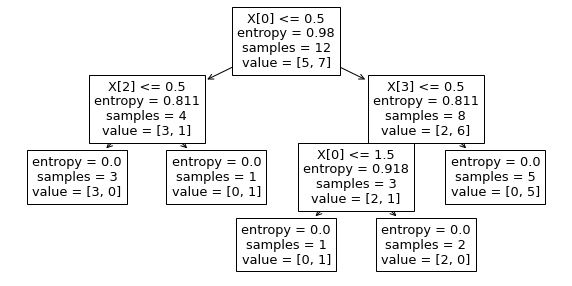

In [ ]:
fig = plt.figure(figsize=(10,5))
tree.plot_tree(dt_entropy.fit(X_train, Y_train))